In [33]:
!git clone https://github.com/rohit-krish/Deeplex.git
%cd Deeplex

Cloning into 'Deeplex'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 93 (delta 40), reused 74 (delta 28), pack-reused 0
Receiving objects: 100% (93/93), 114.14 KiB | 3.80 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/Deeplex


In [68]:
import numpy as np
from sklearn.datasets import load_iris
from tqdm import tqdm

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

from deeplex import nn, act_func, optim, loss_func
from deeplex.engine import Tensor

plt.style.use(plt.style.available[11])

In [38]:
iris = load_iris()

X = iris.data
y = iris.target

# one-hot encode
Y = np.empty((len(y), len(iris.target_names)))
for i, t in enumerate(y):
    row = np.zeros((len(iris.target_names)))
    row[t] = 1
    Y[i] = row

X = Tensor(X)
Y = Tensor(Y)

X.shape, Y.shape

((150, 4), (150, 3))

In [39]:
class Model(nn.Module):
    def __init__(self, n_in, n_out) -> None:
        self.l1 = nn.Linear(n_in, 10)
        self.l2 = nn.Linear(10, 4)
        self.l3 = nn.Linear(4, n_out)

    def __call__(self, x):
        x = act_func.relu(self.l1(x))
        x = act_func.relu(self.l2(x))
        x = act_func.softmax(self.l3(x))
        return x

    def parameters(self):
        return self.l1.parameters() + self.l2.parameters() + self.l3.parameters()


In [41]:
losses = []
model = Model(4, 3)

lr = .09
n_epochs = 100
optimizer = optim.Adam(model.parameters(), lr=lr)

loop = tqdm(range(n_epochs))

for epoch_i in loop:
    yHat = model(X)
    loss = loss_func.MSELoss(Y, yHat)

    model.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)
    loop.set_postfix(loss=loss.data)


100%|██████████| 100/100 [02:00<00:00,  1.21s/it, loss=0.010591423537810906]


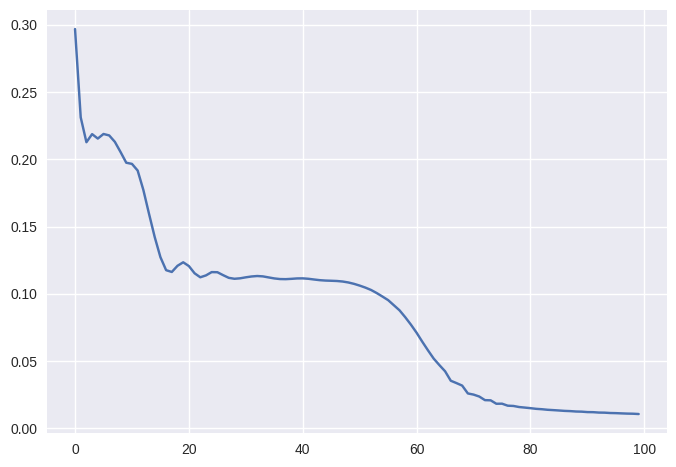

In [69]:
plt.plot(losses)
plt.show()

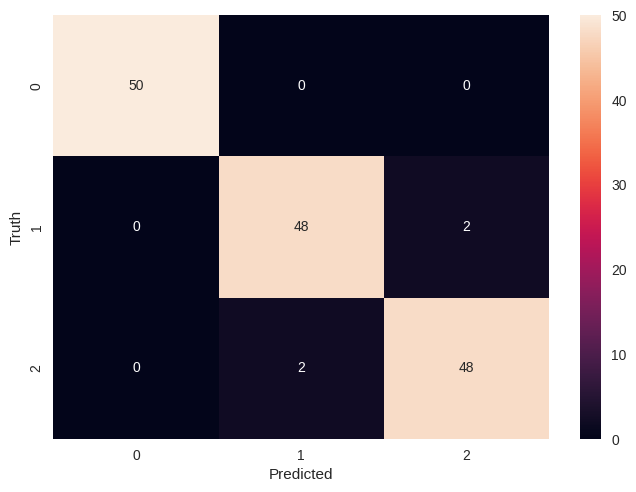

In [70]:
preds = model(X).to_numpy()
preds = np.argmax(preds, axis=1)

truth = np.argmax(Y.to_numpy(), axis=1)

cmap = confusion_matrix(truth, preds)
sb.heatmap(cmap, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [71]:
print(classification_report(truth, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

